# Simulation with biases

First update the system path the include ``ising_sim``.

In [1]:
import sys
sys.path.append("..")

Define the length of the 1D chain, and the strength of the coupling.

In [2]:
N, J = 200, -1

We define a function that takes a simulation object and computes the average correlation to spin 0.

In [3]:
from ising_sim import compute_correlations
from numpy import linspace

def simulate_avg_correlation(sim, num_steps, iters=200):
    """
    We simulate starting at a temperature 4 and cooling to
    temperature 0.2.
    
    sim : IsingSimulation object.
    num_steps : int.
        How many steps to take to cool from T = 4 to T = 0.2.
    iters : the number of times to run the simulation.
    """
    ending_corrs = []
    for _ in range(iters):
        sim.reset()
    
        # sufficiently randomize the initial state
        sim.update(5, num_updates=50)
        
        for T in linspace(4, 0.2, num_steps):
            sim.update(T)
        
        # compute the average correlation over the
        # last 25 states encountered in the simulation.
        past_states = sim.get_past_states(25)
        ending_corrs.append(compute_correlations(past_states))
    
    sim.reset()

     # compute the average over all of the correlations
    return [
        sum(s[i] for s in ending_corrs) / len(ending_corrs)
        for i in range(N)
    ]


Now we define two schedules, a *fast* and a *slow* schedule. These indicate the amount of time we spend in the cooling process from $T = 4$ to $T = 0.2$.

In [4]:
fast_schedule = 400
slow_schedule = 4000

Next, we create two Ising Simulations; one with no local fields and one with small fields at random spins to simulate random spin biases.

In [5]:
from ising_sim.sim import IsingSimulation
import random

# local field bias
h = abs(J) / 5
# create random biases
local_fields = [h * random.choice((-1, 0, 1)) for _ in range(N)]

sim_wo_bias = IsingSimulation(N, J)
sim_w_bias = IsingSimulation(N, J, local_fields=local_fields)

Now let's compute the correlations with the function we defined earlier. *This cell will take a long time to run!*

In [6]:
no_bias_fast_schedule = simulate_avg_correlation(sim_wo_bias, fast_schedule)
print("Finished no_bias_fast_schedule")
no_bias_slow_schedule = simulate_avg_correlation(sim_wo_bias, slow_schedule)
print("Finished no_bias_slow_schedule")
bias_fast_schedule = simulate_avg_correlation(sim_w_bias, fast_schedule)
print("Finished bias_fast_schedule")
bias_slow_schedule = simulate_avg_correlation(sim_w_bias, slow_schedule)
print("Finished bias_slow_schedule")

Finished no_bias_fast_schedule
Finished no_bias_slow_schedule
Finished bias_fast_schedule
Finished bias_slow_schedule


Now we plot the results.

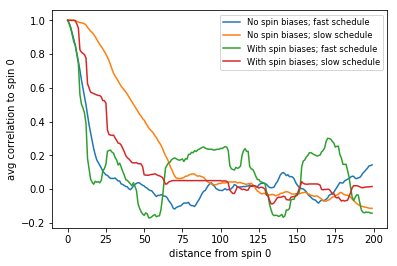

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

plt.plot(no_bias_fast_schedule, label="No spin biases; fast schedule")
plt.plot(no_bias_slow_schedule, label="No spin biases; slow schedule")
plt.plot(bias_fast_schedule, label="With spin biases; fast schedule")
plt.plot(bias_slow_schedule, label="With spin biases; slow schedule")

plt.xlabel("distance from spin 0")
plt.ylabel('avg correlation to spin 0')
plt.legend(fontsize="small")

plt.show()

Compare the results.